### Experimental notebook, also where I did some hyperparameter tuning, Is a mess and some of the code isnt working

import zipfile as zf
files = zf.ZipFile("archive.zip", 'r')
files.extractall('Jobsdata')
files.close()

In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import random
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.utils.data
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import random_split
import torch.optim as optim
import torch
import torch.utils.data
from torch.autograd import Variable
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from torch.optim import Optimizer
import math
import torchvision.transforms as transforms
import torchvision
import os
from torch.autograd import Variable

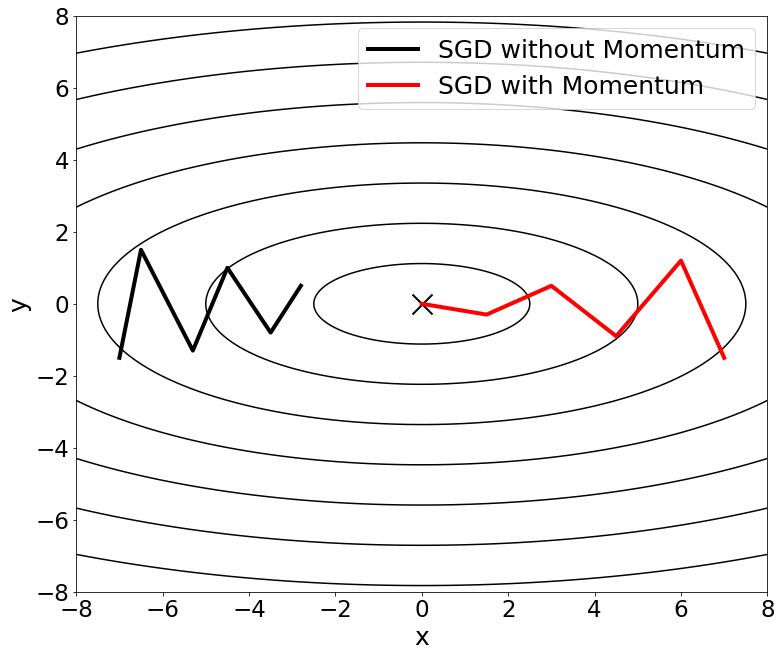

In [2]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(12,10))
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes([left, bottom, width, height]) 

start, stop, n_values = -8, 8, 800

x_vals = np.linspace(start, stop, n_values)
y_vals = np.linspace(start, stop, n_values)
X, Y = np.meshgrid(x_vals, y_vals)


Z = np.sqrt(X**2 + 5*Y**2)

cp = plt.contour(X, Y, Z,colors='black')
#plt.colorbar(cp)
ax.scatter(0,0, marker = 'x', c = 'black', s = 400,linewidths=2)

x = [-7,-6.5,-5.3,-4.5,-3.5, -2.8]
y = [-1.5,1.5,-1.3,1.0,-0.8,0.5]
ax.plot(x,y,linewidth=4, color = 'black',label = 'SGD without Momentum')


x = [7,6,4.5,3,1.5, 0]
y = [-1.5,1.2,-0.9,0.5,-0.3,0]
ax.plot(x,y,linewidth=4, color = 'red', label = 'SGD with Momentum')
ax.legend(fontsize = 25)

ax.set_xlabel('x', fontsize = 25)
ax.set_ylabel('y', fontsize = 25)
ax.tick_params(axis='both', which='major', labelsize=23)
ax.tick_params(axis='both', which='minor', labelsize=23)
plt.show()

Text(0, 0.5, 'Loss')

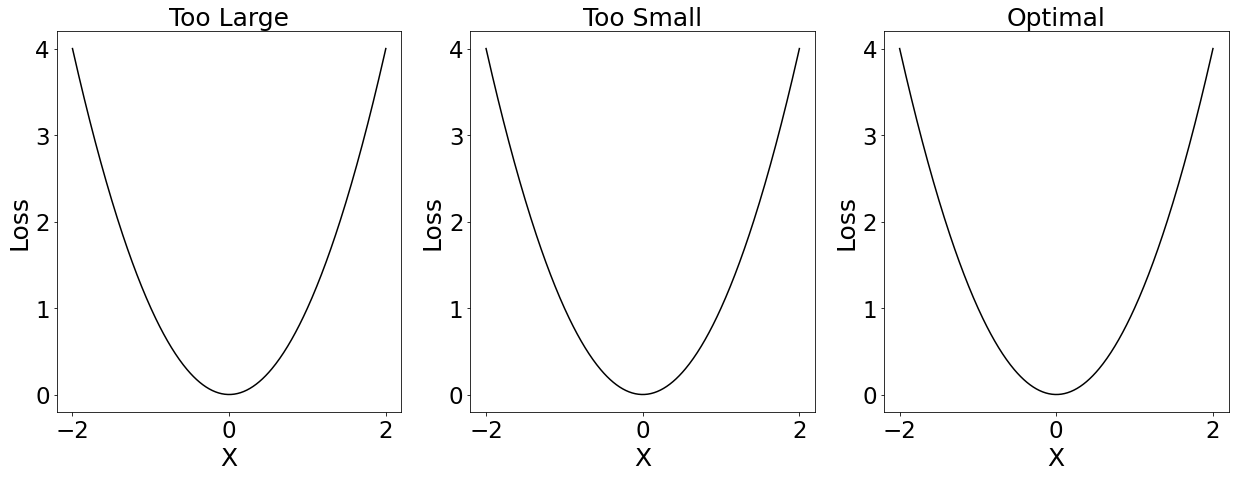

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Some example data to display
x = np.linspace(-2, 2 , 400)
y = x**2

fig, axs = plt.subplots(1, 3,figsize=(21,7))
axs[0].plot(x, y,'black')
axs[0].set_title('Too Large', fontsize = 25)

axs[ 1].plot(x, y,'black')
axs[ 1].set_title('Too Small', fontsize = 25)

axs[ 2].plot(x, y,'black')
axs[ 2].set_title('Optimal', fontsize = 25)

axs[0].tick_params(axis='both', which='major', labelsize=23)
axs[0].tick_params(axis='both', which='minor', labelsize=23)

axs[1].tick_params(axis='both', which='major', labelsize=23)
axs[1].tick_params(axis='both', which='minor', labelsize=23)

axs[2].tick_params(axis='both', which='major', labelsize=23)
axs[2].tick_params(axis='both', which='minor', labelsize=23)


axs[0].set_xlabel('X',fontsize = 25)
axs[1].set_xlabel('X',fontsize = 25)
axs[2].set_xlabel('X',fontsize = 25)

axs[0].set_ylabel('Loss',fontsize = 25)
axs[1].set_ylabel('Loss',fontsize = 25)
axs[2].set_ylabel('Loss',fontsize = 25)



# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
#    ax.label_outer()

In [4]:
def seed_everything(seed_value):
    random.seed(seed_value)
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    os.environ['PYTHONHASHSEED'] = str(seed_value)
    
    if torch.cuda.is_available(): 
        torch.cuda.manual_seed(seed_value)
        torch.cuda.manual_seed_all(seed_value)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False
        


In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [6]:
class MY(Optimizer):
    r"""Implements Adam and SGD mix algorithm.
    """

    def __init__(self,
                 params,
                 lr=1e-3, weight_decay=0,
                 betas=(0.9, 0.999), eps=1e-8, amsgrad=False,
                 momentum=0, dampening=0, nesterov=False,SGD_weight = 0.5, Adam_weight = 0.8, opPrint = False):    
        if not 0.0 <= lr:
            raise ValueError("Invalid learning rate: {}".format(lr))
        if not 0.0 <= eps:
            raise ValueError("Invalid epsilon value: {}".format(eps))
        if not 0.0 <= betas[0] < 1.0:
            raise ValueError("Invalid beta parameter at index 0: {}".format(betas[0]))
        if not 0.0 <= betas[1] < 1.0:
            raise ValueError("Invalid beta parameter at index 1: {}".format(betas[1]))
        if not 0.0 <= weight_decay:
            raise ValueError("Invalid weight_decay value: {}".format(weight_decay))
        defaults = dict(
            lr=lr, weight_decay=weight_decay,
            betas=betas, eps=eps, amsgrad=amsgrad,
            momentum=momentum, dampening=dampening, nesterov=nesterov,Adam_weight = Adam_weight, SGD_weight = SGD_weight, phase = 'ADAM'
        )
        super(MY, self).__init__(params, defaults)

    def __setstate__(self, state):
        super(MY, self).__setstate__(state)
        for group in self.param_groups:
            group.setdefault('amsgrad', False)
            group.setdefault('nesterov', False)

    @torch.no_grad()
    def step(self ,current_epoch, No_epoch, adam_phase, mix_phase, Mix_batch_count, closure=None):
        """Performs a single optimization step.

        Arguments:
            closure (callable, optional): A closure that reevaluates the model
                and returns the loss.
        """
        
        loss = None
        if closure is not None:
            with torch.enable_grad():
                loss = closure()

        inc_list = np.linspace(0,1,int((adam_phase*No_epoch + mix_phase*No_epoch)-adam_phase*No_epoch))
        for group in self.param_groups:
            
            
            
            if current_epoch <= adam_phase*No_epoch:
                
                group['phase'] = "ADAM"
                if opPrint == True:
                    print("ADAM | Current epoch = ",current_epoch)


            elif adam_phase*No_epoch <= current_epoch <= (adam_phase*No_epoch + mix_phase*No_epoch):

                group['phase'] = 'MIX'
                group['Adam_weight'] = 1-inc_list[Mix_batch_count]
                group['SGD_weight'] = inc_list[Mix_batch_count]
                
                if opPrint == True:
                    print("\nMix batch count = ", Mix_batch_count)
                    print("\nMIX | Current epoch = ",current_epoch)
                    print("MIX | SGD Weight = ",group['SGD_weight'])
                    print("MIX | Adam Weight = ",group['Adam_weight'])

            else:
                group['phase'] = 'SGD'
                if opPrint == True:
                    print("SGD | Current epoch = ",current_epoch)
            
            for p in group['params']:
                

                
                
                if p.grad is None:
                    continue
                    
                grad = p.grad
                
                if grad.is_sparse:
                    raise RuntimeError('MY does not support sparse gradients')
                
                
                amsgrad = group['amsgrad']
                state = self.state[p]
                
                # State initialization
                if len(state) == 0:
                    
                    state['step'] = 0
                    # Exponential moving average of gradient values
                    state['exp_avg'] = torch.zeros_like(p, memory_format=torch.preserve_format)
                    # Exponential moving average of squared gradient values
                    state['exp_avg_sq'] = torch.zeros_like(p, memory_format=torch.preserve_format)
                    if amsgrad:
                        # Maintains max of all exp. moving avg. of sq. grad. values
                        state['max_exp_avg_sq'] = torch.zeros_like(p, memory_format=torch.preserve_format)

                exp_avg, exp_avg_sq = state['exp_avg'], state['exp_avg_sq']

                if amsgrad:
                    max_exp_avg_sq = state['max_exp_avg_sq']

                beta1, beta2 = group['betas']
                state['step'] += 1
                
                
                if group['weight_decay'] != 0:
                    grad = grad.add(p, alpha=group['weight_decay'])
                

                if group['phase'] == 'SGD':
                    
                    d_p_sgd = self.sgd_step(grad, group, p)
                    
                    p.add_(d_p_sgd, alpha=-group['lr'])
                    
                    
                    continue
                    


                bias_correction1 = 1 - beta1 ** state['step']
                bias_correction2 = 1 - beta2 ** state['step']


                # Decay the first and second moment running average coefficient
                exp_avg.mul_(beta1).add_(grad, alpha=1 - beta1)
                exp_avg_sq.mul_(beta2).addcmul_(grad, grad, value=1 - beta2)

                if amsgrad:
                    # Maintains the maximum of all 2nd moment running avg. till now
                    torch.max(max_exp_avg_sq, exp_avg_sq, out=max_exp_avg_sq)
                    # Use the max. for normalizing running avg. of gradient
                    denom = (max_exp_avg_sq.sqrt() / math.sqrt(bias_correction2)).add_(group['eps'])
                else:
                    denom = (exp_avg_sq.sqrt() / math.sqrt(bias_correction2)).add_(group['eps'])
                
                step_size = group['lr'] / bias_correction1

                d_p = exp_avg / denom  
                
                
                if group['phase'] == 'MIX':

                    d_p_sgd = self.sgd_step(grad, group, p)
                    

                    megred_d_p = group['SGD_weight'].item()*(torch.tensor(d_p_sgd,dtype=float)) # group['Adam_weight'].item().mul_(d_p)
                    
                    merged_lr = group['SGD_weight'].item() * group['lr'] + group['Adam_weight'].item() * step_size

                    p.add_(megred_d_p, alpha=-merged_lr)
                    
                    
                    
                    continue
                            
                
                
                p.add_(d_p, alpha=-step_size)
                
        
        checker = group['phase']
        return checker
        
               
    def check(self, group):
        if group == 'MIX':
            return True


    def sgd_step(self, grad, group, p):
        d_p = grad

        momentum = group['momentum']
        dampening = group['dampening']
        nesterov = group['nesterov']
            
            
        if momentum != 0:
            param_state = self.state[p]
            
            if 'momentum_buffer' not in param_state:
                buf = param_state['momentum_buffer'] = torch.clone(d_p).detach()
            else:
                buf = param_state['momentum_buffer']
                buf.mul_(momentum).add_(d_p, alpha=1 - dampening)
            if nesterov:
                d_p = d_p.add(buf, alpha=momentum)
            else:
                d_p = buf

        return d_p

In [7]:
class MY_2(Optimizer):
    r"""Implements Adam and SGD mix algorithm.
    """

    def __init__(self,
                 params,tolerance,
                 lr=1e-3, weight_decay=0, 
                 betas=(0.9, 0.999), eps=1e-8, amsgrad=False,
                 momentum=0, dampening=0, nesterov=False,SGD_weight = 0.5, Adam_weight = 0.8, opPrint = False):    
        if not 0.0 <= lr:
            raise ValueError("Invalid learning rate: {}".format(lr))
        if not 0.0 <= eps:
            raise ValueError("Invalid epsilon value: {}".format(eps))
        if not 0.0 <= betas[0] < 1.0:
            raise ValueError("Invalid beta parameter at index 0: {}".format(betas[0]))
        if not 0.0 <= betas[1] < 1.0:
            raise ValueError("Invalid beta parameter at index 1: {}".format(betas[1]))
        if not 0.0 <= weight_decay:
            raise ValueError("Invalid weight_decay value: {}".format(weight_decay))
        defaults = dict(
            lr=lr, weight_decay=weight_decay,tolerance = tolerance,
            betas=betas, eps=eps, amsgrad=amsgrad,
            momentum=momentum, dampening=dampening, nesterov=nesterov,Adam_weight = Adam_weight, SGD_weight = SGD_weight, phase = 'ADAM'
        )
        super(MY_2, self).__init__(params, defaults)

    def __setstate__(self, state):
        super(MY_2, self).__setstate__(state)
        for group in self.param_groups:
            group.setdefault('amsgrad', False)
            group.setdefault('nesterov', False)

    @torch.no_grad()
    def step(self ,current_epoch, No_epoch, mix_phase, Mix_batch_count, closure=None):
        """Performs a single optimization step.

        Arguments:
            closure (callable, optional): A closure that reevaluates the model
                and returns the loss.
        """
        
        loss = None
        if closure is not None:
            with torch.enable_grad():
                loss = closure()

        inc_list = np.linspace(0,1,int(mix_phase*No_epoch)+1)
                               
        for group in self.param_groups:
            if Mix_batch_count > mix_phase*No_epoch:
                    group['phase'] = 'SGD'
                    if opPrint == True:
                        print("SGD | Current epoch = ",current_epoch)
            for p in group['params']:
                

                
                
                if p.grad is None:
                    continue
                    
                grad = p.grad
                
                if grad.is_sparse:
                    raise RuntimeError('MY does not support sparse gradients')
                
                
                amsgrad = group['amsgrad']
                state = self.state[p]
                
                # State initialization
                if len(state) == 0:
                    
                    state['step'] = 0
                    # Exponential moving average of gradient values
                    state['exp_avg'] = torch.zeros_like(p, memory_format=torch.preserve_format)
                    # Exponential moving average of squared gradient values
                    state['exp_avg_sq'] = torch.zeros_like(p, memory_format=torch.preserve_format)
                    state['exp_avg2'] = p.new(1).fill_(0)
                    if amsgrad:
                        # Maintains max of all exp. moving avg. of sq. grad. values
                        state['max_exp_avg_sq'] = torch.zeros_like(p, memory_format=torch.preserve_format)

                exp_avg, exp_avg_sq,exp_avg2  = state['exp_avg'], state['exp_avg_sq'],state['exp_avg2']

                if amsgrad:
                    max_exp_avg_sq = state['max_exp_avg_sq']

                beta1, beta2 = group['betas']
                state['step'] += 1
                
                
                if group['weight_decay'] != 0:
                    grad = grad.add(p, alpha=group['weight_decay'])
                

                if group['phase'] == 'SGD':
                    
                    d_p_sgd = self.sgd_step(grad, group, p)
                    
                    p.add_(d_p_sgd, alpha=-group['lr'])
                    
                    
                    
                    


                bias_correction1 = 1 - beta1 ** state['step']
                bias_correction2 = 1 - beta2 ** state['step']


                # Decay the first and second moment running average coefficient
                exp_avg.mul_(beta1).add_(grad, alpha=1 - beta1)
                exp_avg_sq.mul_(beta2).addcmul_(grad, grad, value=1 - beta2)

                if amsgrad:
                    # Maintains the maximum of all 2nd moment running avg. till now
                    torch.max(max_exp_avg_sq, exp_avg_sq, out=max_exp_avg_sq)
                    # Use the max. for normalizing running avg. of gradient
                    denom = (max_exp_avg_sq.sqrt() / math.sqrt(bias_correction2)).add_(group['eps'])
                else:
                    denom = (exp_avg_sq.sqrt() / math.sqrt(bias_correction2)).add_(group['eps'])
                
                step_size = group['lr'] / bias_correction1

                d_p = exp_avg / denom  
                
                
                if group['phase'] == 'MIX':
                    if opPrint == True:
                        print("\nMix batch count = ", Mix_batch_count)
                        print("\nMIX | Current epoch = ",current_epoch)
                        print("MIX | SGD Weight = ",group['SGD_weight'])
                        print("MIX | Adam Weight = ",group['Adam_weight'])

                               
                    group['Adam_weight'] = 1-inc_list[Mix_batch_count]
                    group['SGD_weight'] = inc_list[Mix_batch_count]
                    d_p_sgd = self.sgd_step(grad, group, p)
                    

                    megred_d_p = group['SGD_weight'].item()*(torch.tensor(d_p_sgd,dtype=float)) # group['Adam_weight'].item().mul_(d_p)
                    
                    merged_lr = group['SGD_weight'].item() * group['lr'] + group['Adam_weight'].item() * step_size

                    p.add_(megred_d_p, alpha=-merged_lr)
                    
                    
                    
                    
                            
                
                if group['phase'] == 'ADAM':
                    p.add_(d_p, alpha=-step_size)
                
                #Conditioning check for transition
                p_view = p.view(-1)
                pg = p_view.dot(grad.view(-1))
                

                
                
                

                
                # the non-orthognal scaling estimate
                scaling = p_view.dot(p_view) / -pg
                exp_avg2.mul_(beta2).add_(scaling, alpha=1 - beta2)

                # bias corrected exponential average
                corrected_exp_avg = exp_avg2 / bias_correction2
                    
                    
                    
                    
                    
                    #print("difference",scaling-corrected_exp_avg)
                    #print(corrected_exp_avg.allclose(scaling, rtol=1e-1))
                    # checking criteria of switching to SGD training
                if (
                        state['step'] > 1
                        and corrected_exp_avg.allclose(scaling, rtol=group['tolerance'])
                        and corrected_exp_avg > 0
                        and Mix_batch_count < mix_phase*No_epoch
                    ):
                        
                    group['phase'] = 'MIX'
                    group['lr'] = corrected_exp_avg.item()
                        
                        
                
                        
                        

        checker = group['phase']
        return checker
        
               
    def check(self, group):
        if group == 'MIX':
            return True


    def sgd_step(self, grad, group, p):
        d_p = grad

        momentum = group['momentum']
        dampening = group['dampening']
        nesterov = group['nesterov']
            
            
        if momentum != 0:
            param_state = self.state[p]
            
            if 'momentum_buffer' not in param_state:
                buf = param_state['momentum_buffer'] = torch.clone(d_p).detach()
            else:
                buf = param_state['momentum_buffer']
                buf.mul_(momentum).add_(d_p, alpha=1 - dampening)
            if nesterov:
                d_p = d_p.add(buf, alpha=momentum)
            else:
                d_p = buf

        return d_p

In [8]:
class MY_2(Optimizer):
    r"""Implements Adam and SGD mix algorithm.
    """

    def __init__(self,
                 params,tolerance,
                 lr=1e-3, weight_decay=0, 
                 betas=(0.9, 0.999), eps=1e-8, amsgrad=False,
                 momentum=0, dampening=0, nesterov=False,SGD_weight = 0.5, Adam_weight = 0.8, opPrint = False):    
        if not 0.0 <= lr:
            raise ValueError("Invalid learning rate: {}".format(lr))
        if not 0.0 <= eps:
            raise ValueError("Invalid epsilon value: {}".format(eps))
        if not 0.0 <= betas[0] < 1.0:
            raise ValueError("Invalid beta parameter at index 0: {}".format(betas[0]))
        if not 0.0 <= betas[1] < 1.0:
            raise ValueError("Invalid beta parameter at index 1: {}".format(betas[1]))
        if not 0.0 <= weight_decay:
            raise ValueError("Invalid weight_decay value: {}".format(weight_decay))
        defaults = dict(
            lr=lr, weight_decay=weight_decay,tolerance = tolerance,
            betas=betas, eps=eps, amsgrad=amsgrad,
            momentum=momentum, dampening=dampening, nesterov=nesterov,Adam_weight = Adam_weight, SGD_weight = SGD_weight, phase = 'ADAM'
        )
        super(MY_2, self).__init__(params, defaults)

    def __setstate__(self, state):
        super(MY_2, self).__setstate__(state)
        for group in self.param_groups:
            group.setdefault('amsgrad', False)
            group.setdefault('nesterov', False)

    @torch.no_grad()
    def step(self ,current_epoch, No_epoch, mix_phase, Mix_batch_count, closure=None):
        """Performs a single optimization step.

        Arguments:
            closure (callable, optional): A closure that reevaluates the model
                and returns the loss.
        """
        
        loss = None
        if closure is not None:
            with torch.enable_grad():
                loss = closure()

        inc_list = np.linspace(0,1,int(mix_phase*No_epoch)+1)
                               
        for group in self.param_groups:
            if Mix_batch_count > mix_phase*No_epoch:
                    group['phase'] = 'SGD'
                    if opPrint == True:
                        print("SGD | Current epoch = ",current_epoch)
            for p in group['params']:
                

                
                
                if p.grad is None:
                    continue
                    
                grad = p.grad
                
                if grad.is_sparse:
                    raise RuntimeError('MY does not support sparse gradients')
                
                
                amsgrad = group['amsgrad']
                state = self.state[p]
                
                # State initialization
                if len(state) == 0:
                    
                    state['step'] = 0
                    # Exponential moving average of gradient values
                    state['exp_avg'] = torch.zeros_like(p, memory_format=torch.preserve_format)
                    # Exponential moving average of squared gradient values
                    state['exp_avg_sq'] = torch.zeros_like(p, memory_format=torch.preserve_format)
                    state['exp_avg2'] = p.new(1).fill_(0)
                    if amsgrad:
                        # Maintains max of all exp. moving avg. of sq. grad. values
                        state['max_exp_avg_sq'] = torch.zeros_like(p, memory_format=torch.preserve_format)

                exp_avg, exp_avg_sq,exp_avg2  = state['exp_avg'], state['exp_avg_sq'],state['exp_avg2']

                if amsgrad:
                    max_exp_avg_sq = state['max_exp_avg_sq']

                beta1, beta2 = group['betas']
                state['step'] += 1
                
                
                if group['weight_decay'] != 0:
                    grad = grad.add(p, alpha=group['weight_decay'])
                

                if group['phase'] == 'SGD':
                    
                    d_p_sgd = self.sgd_step(grad, group, p)
                    
                    p.add_(d_p_sgd, alpha=-group['lr'])
                    
                    
                    
                    


                bias_correction1 = 1 - beta1 ** state['step']
                bias_correction2 = 1 - beta2 ** state['step']


                # Decay the first and second moment running average coefficient
                exp_avg.mul_(beta1).add_(grad, alpha=1 - beta1)
                exp_avg_sq.mul_(beta2).addcmul_(grad, grad, value=1 - beta2)

                if amsgrad:
                    # Maintains the maximum of all 2nd moment running avg. till now
                    torch.max(max_exp_avg_sq, exp_avg_sq, out=max_exp_avg_sq)
                    # Use the max. for normalizing running avg. of gradient
                    denom = (max_exp_avg_sq.sqrt() / math.sqrt(bias_correction2)).add_(group['eps'])
                else:
                    denom = (exp_avg_sq.sqrt() / math.sqrt(bias_correction2)).add_(group['eps'])
                
                step_size = group['lr'] / bias_correction1

                d_p = exp_avg / denom  
                
                
                if group['phase'] == 'MIX':
                    if opPrint == True:
                        print("\nMix batch count = ", Mix_batch_count)
                        print("\nMIX | Current epoch = ",current_epoch)
                        print("MIX | SGD Weight = ",group['SGD_weight'])
                        print("MIX | Adam Weight = ",group['Adam_weight'])

                               
                    group['Adam_weight'] = 1-inc_list[Mix_batch_count]
                    group['SGD_weight'] = inc_list[Mix_batch_count]
                    d_p_sgd = self.sgd_step(grad, group, p)
                    

                    megred_d_p = group['SGD_weight'].item()*(torch.tensor(d_p_sgd,dtype=float)) # group['Adam_weight'].item().mul_(d_p)
                    
                    merged_lr = group['SGD_weight'].item() * group['lr'] + group['Adam_weight'].item() * step_size

                    p.add_(megred_d_p, alpha=-merged_lr)
                    
                    
                    
                    
                            
                
                if group['phase'] == 'ADAM':
                    p.add_(d_p, alpha=-step_size)
                
                #Conditioning check for transition
                p_view = p.view(-1)
                pg = p_view.dot(grad.view(-1))
                

                
                
                

                
                # the non-orthognal scaling estimate
                scaling = p_view.dot(p_view) / -pg
                exp_avg2.mul_(beta2).add_(scaling, alpha=1 - beta2)

                # bias corrected exponential average
                corrected_exp_avg = exp_avg2 / bias_correction2
                    
                    
                    
                    
                    
                    #print("difference",scaling-corrected_exp_avg)
                    #print(corrected_exp_avg.allclose(scaling, rtol=1e-1))
                    # checking criteria of switching to SGD training
                if (
                        state['step'] > 1
                        and corrected_exp_avg.allclose(scaling, rtol=group['tolerance'])
                        and corrected_exp_avg > 0
                        and Mix_batch_count < mix_phase*No_epoch
                    ):
                        
                    group['phase'] = 'MIX'
                    group['lr'] = corrected_exp_avg.item()
                        
                        
                
                        
                        

        checker = group['phase']
        return checker
        
               
    def check(self, group):
        if group == 'MIX':
            return True


    def sgd_step(self, grad, group, p):
        d_p = grad

        momentum = group['momentum']
        dampening = group['dampening']
        nesterov = group['nesterov']
            
            
        if momentum != 0:
            param_state = self.state[p]
            
            if 'momentum_buffer' not in param_state:
                buf = param_state['momentum_buffer'] = torch.clone(d_p).detach()
            else:
                buf = param_state['momentum_buffer']
                buf.mul_(momentum).add_(d_p, alpha=1 - dampening)
            if nesterov:
                d_p = d_p.add(buf, alpha=momentum)
            else:
                d_p = buf

        return d_p

In [9]:
class SWATS(Optimizer):
    r"""Implements SWATS Optimizer Algorithm.
    It has been proposed in `Improving Generalization Performance by
    Switching from Adam to SGD`__.

    Arguments:
        params: iterable of parameters to optimize or dicts defining
            parameter groups
        lr: learning rate (default: 1e-2)
        betas: coefficients used for computing
            running averages of gradient and its square (default: (0.9, 0.999))
        eps: term added to the denominator to improve
            numerical stability (default: 1e-3)
        weight_decay: weight decay (L2 penalty) (default: 0)
        amsgrad: whether to use the AMSGrad variant of this
            algorithm from the paper `On the Convergence of Adam and Beyond`
            (default: False)
        nesterov: enables Nesterov momentum (default: False)


    Example:
        >>> import torch_optimizer as optim
        >>> optimizer = optim.SWATS(model.parameters(), lr=0.01)
        >>> optimizer.zero_grad()
        >>> loss_fn(model(input), target).backward()
        >>> optimizer.step()

    __ https://arxiv.org/pdf/1712.07628.pdf

    Note:
        Reference code: https://github.com/Mrpatekful/swats
    """

    def __init__(self,
        params,
        lr,
        betas,
        eps,
        tolerance,
        weight_decay,
        amsgrad,
        nesterov):
        if not 0.0 <= lr:
            raise ValueError('Invalid learning rate: {}'.format(lr))
        if not 0.0 <= eps:
            raise ValueError('Invalid epsilon value: {}'.format(eps))
        if not 0.0 <= tolerance:
            raise ValueError('Invalid tol value: {}'.format(tolerance))
        if not 0.0 <= betas[0] < 1.0:
            raise ValueError(
                'Invalid beta parameter at index 0: {}'.format(betas[0]))
        if not 0.0 <= betas[1] < 1.0:
            raise ValueError(
                'Invalid beta parameter at index 1: {}'.format(betas[1])
            )
        defaults = dict(
            lr=lr,
            betas=betas,
            eps=eps,
            tolerance=tolerance,
            phase='ADAM',
            weight_decay=weight_decay,
            amsgrad=amsgrad,
            nesterov=nesterov
        )

        super().__init__(params, defaults)

    def __setstate__(self,State):
        super().__setstate__(state)
        for group in self.param_groups:
            group.setdefault('amsgrad', False)
            group.setdefault('nesterov', False)

    def step(self, closure=None):
        r"""Performs a single optimization step.

        Arguments:
            closure: A closure that reevaluates the model and returns the loss.
        """
        loss = None
        if closure is not None:
            loss = closure()
        total = [0]
        difference = []
        for group in self.param_groups:
            for w in group['params']:
                if w.grad is None:
                    continue
                grad = w.grad.data

                if grad.is_sparse:
                    raise RuntimeError(
                        'Adam does not support sparse gradients, '
                        'please consider SparseAdam instead'
                    )

                amsgrad = group['amsgrad']

                state = self.state[w]

                # state initialization
                if len(state) == 0:
                    state['step'] = 0
                    # exponential moving average of gradient values
                    state['exp_avg'] = torch.zeros_like(w.data)
                    # exponential moving average of squared gradient values
                    state['exp_avg_sq'] = torch.zeros_like(w.data)
                    # moving average for the non-orthogonal projection scaling
                    state['exp_avg2'] = w.new(1).fill_(0)
                    if amsgrad:
                        # maintains max of all exp. moving avg.
                        # of sq. grad. values
                        state['max_exp_avg_sq'] = torch.zeros_like(w.data)

                exp_avg, exp_avg2, exp_avg_sq = (
                    state['exp_avg'],
                    state['exp_avg2'],
                    state['exp_avg_sq'],
                )

                if amsgrad:
                    max_exp_avg_sq = state['max_exp_avg_sq']
                beta1, beta2 = group['betas']

                state['step'] += 1

                if group['weight_decay'] != 0:
                    grad.add_(w.data, alpha=group['weight_decay'])

                # if its SGD phase, take an SGD update and continue
                if group['phase'] == 'SGD':
                    
                    if 'momentum_buffer' not in state:
                        buf = state['momentum_buffer'] = torch.clone(
                            grad
                        ).detach()
                    else:
                        buf = state['momentum_buffer']
                        buf.mul_(beta1).add_(grad)
                        grad = buf

                    grad.mul_(1 - beta1)
                    if group['nesterov']:
                        grad.add_(buf, alpha=beta1)

                    w.data.add_(grad, alpha=-group['lr'])
                    continue

                # decay the first and second moment running average coefficient
                exp_avg.mul_(beta1).add_(grad, alpha=1 - beta1)
                exp_avg_sq.mul_(beta2).addcmul_(grad, grad, value=1 - beta2)
                if amsgrad:
                    # maintains the maximum of all 2nd
                    # moment running avg. till now
                    torch.max(max_exp_avg_sq, exp_avg_sq, out=max_exp_avg_sq)
                    # use the max. for normalizing running avg. of gradient
                    denom = max_exp_avg_sq.sqrt().add_(group['eps'])
                else:
                    denom = exp_avg_sq.sqrt().add_(group['eps'])

                bias_correction1 = 1 - beta1 ** state['step']
                bias_correction2 = 1 - beta2 ** state['step']
                step_size = (
                    group['lr'] * (bias_correction2 ** 0.5) / bias_correction1
                )

                p = -step_size * (exp_avg / denom)
                w.data.add_(p)

                p_view = p.view(-1)
                pg = p_view.dot(grad.view(-1))

                if pg != 0:
                    # the non-orthognal scaling estimate
                    scaling = p_view.dot(p_view) / -pg
                    exp_avg2.mul_(beta2).add_(scaling, alpha=1 - beta2)

                    # bias corrected exponential average
                    corrected_exp_avg = exp_avg2 / bias_correction2
                    difference.append(corrected_exp_avg.item() - scaling.item())
                    #print("difference",scaling-corrected_exp_avg)
                    #print(corrected_exp_avg.allclose(scaling, rtol=1e-1))
                    # checking criteria of switching to SGD training
                    if (
                        state['step'] > 1
                        and corrected_exp_avg.allclose(scaling, rtol=group['tolerance'])
                        and corrected_exp_avg > 0
                    ):
                        print("I switched here")
                        total.append(state['step'])
                        group['phase'] = 'SGD'
                        group['lr'] = corrected_exp_avg.item()
        
        return loss, total,difference

In [10]:
class AdamSGD(Optimizer):
    r"""Implements Adam and SGD mix algorithm.
    """

    def __init__(self,
                 params, lr=1e-3,
                 betas=(0.9, 0.999), eps=1e-8, amsgrad=False,
                 momentum=0, dampening=0, nesterov=False,
                 adam_w=0.5, sgd_w=0.5):

        #Setting params of function
        defaults = dict(lr=lr,betas=betas, eps=eps, amsgrad=amsgrad,
            momentum=momentum, dampening=dampening, nesterov=nesterov,adam_w=adam_w, sgd_w=sgd_w)
        
        super(AdamSGD, self).__init__(params, defaults)

    def __setstate__(self, state):
        super(AdamSGDWeighted, self).__setstate__(state)
        
        for group in self.param_groups:
            group.setdefault('amsgrad', False)
            group.setdefault('nesterov', False)

    @torch.no_grad()
    def step(self, closure=None):
        """Performs a single optimization step.

        Arguments:
            closure (callable, optional): A closure that reevaluates the model
                and returns the loss.
        """
        #Counting steps
        if not self.state:
            self.state["step"]=1
        else:
            self.state["step"]+=1
        
        #setting exit 
        loss = None
        if closure is not None:
            with torch.enable_grad():
                loss = closure()
        
        #performing the step for each feature
        for group in self.param_groups:
            #Params for each layer
            for p in group['params']:
                
                
                if p.grad is None:
                    continue
                  
                
                grad = p.grad

                #using functions to calc size of one step & gradient of ADAM
                d_p_adam, step_size = self.adam_step(grad, group, p)
                
                #using functions to calc size of one step & gradient of SGD
                d_p_sgd = self.sgd_step(grad, group, p)

                
         
                #merging both gradients together as done in paper
                megred_d_p = group['sgd_w'] * d_p_sgd + group['adam_w'] * d_p_adam
                
                #Merging learning rates
                merged_lr = group['sgd_w'] * group['lr'] + group['adam_w'] * step_size
                
                #updating the gradinet
                p.add_(megred_d_p, alpha=-merged_lr)
        

        return loss

    def adam_step(self, grad, group, p):
        
        amsgrad = group['amsgrad']
        state = self.state[p]
        
        # initializing some variables
        if len(state) == 0:
            state['step'] = 0
            # Exponential moving average of gradient values
            state['exp_avg'] = torch.zeros_like(p, memory_format=torch.preserve_format)
            # Exponential moving average of squared gradient values
            state['exp_avg_sq'] = torch.zeros_like(p, memory_format=torch.preserve_format)
            if amsgrad:
                # Maintains max of all exp. moving avg. of sq. grad. values
                state['max_exp_avg_sq'] = torch.zeros_like(p, memory_format=torch.preserve_format)
                
        #Calling these variables       
        exp_avg, exp_avg_sq = state['exp_avg'], state['exp_avg_sq']
        if amsgrad:
            max_exp_avg_sq = state['max_exp_avg_sq']
            
        #Defining the betas
        beta1, beta2 = group['betas']
        
        #Need to count steps
        state['step'] += 1
        #Bias cals
        bias_correction1 = 1 - beta1 ** state['step']
        bias_correction2 = 1 - beta2 ** state['step']
 
        # Decay the first and second moment running average coefficient
        exp_avg.mul_(beta1).add_(grad, alpha=1 - beta1) #computes mt
        exp_avg_sq.mul_(beta2).addcmul_(grad, grad, value=1 - beta2) # computes vt
        
        
        if amsgrad:
            # Maintains the maximum of all 2nd moment running avg. till now
            torch.max(max_exp_avg_sq, exp_avg_sq, out=max_exp_avg_sq)
            # Use the max. for normalizing running avg. of gradient
            denom = (max_exp_avg_sq.sqrt() / math.sqrt(bias_correction2)).add_(group['eps'])
        else:
            denom = (exp_avg_sq.sqrt() / math.sqrt(bias_correction2)).add_(group['eps'])
        
        
        step_size = group['lr'] / bias_correction1

        d_p = exp_avg / denom
        
        return d_p, step_size

    def sgd_step(self, grad, group, p):
        d_p = grad

        momentum = group['momentum']
        dampening = group['dampening']
        nesterov = group['nesterov']
            
            
        if momentum != 0:
            param_state = self.state[p]
            
            if 'momentum_buffer' not in param_state:
                buf = param_state['momentum_buffer'] = torch.clone(d_p).detach()
            else:
                buf = param_state['momentum_buffer']
                buf.mul_(momentum).add_(d_p, alpha=1 - dampening)
            if nesterov:
                d_p = d_p.add(buf, alpha=momentum)
            else:
                d_p = buf

        return d_p

In [11]:
class AdaBound(Optimizer):
    """Implements AdaBound algorithm.
    It has been proposed in `Adaptive Gradient Methods with Dynamic Bound of Learning Rate`_.
    Arguments:
        params (iterable): iterable of parameters to optimize or dicts defining
            parameter groups
        lr (float, optional): Adam learning rate (default: 1e-3)
        betas (Tuple[float, float], optional): coefficients used for computing
            running averages of gradient and its square (default: (0.9, 0.999))
        final_lr (float, optional): final (SGD) learning rate (default: 0.1)
        gamma (float, optional): convergence speed of the bound functions (default: 1e-3)
        eps (float, optional): term added to the denominator to improve
            numerical stability (default: 1e-8)
        weight_decay (float, optional): weight decay (L2 penalty) (default: 0)
        amsbound (boolean, optional): whether to use the AMSBound variant of this algorithm
    .. Adaptive Gradient Methods with Dynamic Bound of Learning Rate:
        https://openreview.net/forum?id=Bkg3g2R9FX
    """

    def __init__(self, params, lr=1e-3, betas=(0.9, 0.999), final_lr=0.1, gamma=1e-3,
                 eps=1e-8, weight_decay=0, amsbound=False):
        if not 0.0 <= lr:
            raise ValueError("Invalid learning rate: {}".format(lr))
        if not 0.0 <= eps:
            raise ValueError("Invalid epsilon value: {}".format(eps))
        if not 0.0 <= betas[0] < 1.0:
            raise ValueError("Invalid beta parameter at index 0: {}".format(betas[0]))
        if not 0.0 <= betas[1] < 1.0:
            raise ValueError("Invalid beta parameter at index 1: {}".format(betas[1]))
        if not 0.0 <= final_lr:
            raise ValueError("Invalid final learning rate: {}".format(final_lr))
        if not 0.0 <= gamma < 1.0:
            raise ValueError("Invalid gamma parameter: {}".format(gamma))
        defaults = dict(lr=lr, betas=betas, final_lr=final_lr, gamma=gamma, eps=eps,
                        weight_decay=weight_decay, amsbound=amsbound)
        super(AdaBound, self).__init__(params, defaults)

        self.base_lrs = list(map(lambda group: group['lr'], self.param_groups))

    def __setstate__(self, state):
        super(AdaBound, self).__setstate__(state)
        for group in self.param_groups:
            group.setdefault('amsbound', False)

    def step(self, closure=None):
        """Performs a single optimization step.
        Arguments:
            closure (callable, optional): A closure that reevaluates the model
                and returns the loss.
        """
        loss = None
        if closure is not None:
            loss = closure()

        for group, base_lr in zip(self.param_groups, self.base_lrs):
            for p in group['params']:
                if p.grad is None:
                    continue
                grad = p.grad.data
                if grad.is_sparse:
                    raise RuntimeError(
                        'Adam does not support sparse gradients, please consider SparseAdam instead')
                amsbound = group['amsbound']

                state = self.state[p]

                # State initialization
                if len(state) == 0:
                    state['step'] = 0
                    # Exponential moving average of gradient values
                    state['exp_avg'] = torch.zeros_like(p.data)
                    # Exponential moving average of squared gradient values
                    state['exp_avg_sq'] = torch.zeros_like(p.data)
                    if amsbound:
                        # Maintains max of all exp. moving avg. of sq. grad. values
                        state['max_exp_avg_sq'] = torch.zeros_like(p.data)

                exp_avg, exp_avg_sq = state['exp_avg'], state['exp_avg_sq']
                if amsbound:
                    max_exp_avg_sq = state['max_exp_avg_sq']
                beta1, beta2 = group['betas']

                state['step'] += 1

                if group['weight_decay'] != 0:
                    grad = grad.add(group['weight_decay'], p.data)

                # Decay the first and second moment running average coefficient
                exp_avg.mul_(beta1).add_(1 - beta1, grad)
                exp_avg_sq.mul_(beta2).addcmul_(1 - beta2, grad, grad)
                if amsbound:
                    # Maintains the maximum of all 2nd moment running avg. till now
                    torch.max(max_exp_avg_sq, exp_avg_sq, out=max_exp_avg_sq)
                    # Use the max. for normalizing running avg. of gradient
                    denom = max_exp_avg_sq.sqrt().add_(group['eps'])
                else:
                    denom = exp_avg_sq.sqrt().add_(group['eps'])

                bias_correction1 = 1 - beta1 ** state['step']
                bias_correction2 = 1 - beta2 ** state['step']
                step_size = group['lr'] * math.sqrt(bias_correction2) / bias_correction1

                # Applies bounds on actual learning rate
                # lr_scheduler cannot affect final_lr, this is a workaround to apply lr decay
                final_lr = group['final_lr'] * group['lr'] / base_lr
                lower_bound = final_lr * (1 - 1 / (group['gamma'] * state['step'] + 1))
                upper_bound = final_lr * (1 + 1 / (group['gamma'] * state['step']))
                step_size = torch.full_like(denom, step_size)
                step_size.div_(denom).clamp_(lower_bound, upper_bound).mul_(exp_avg)

                p.data.add_(-step_size)

        return loss



### Data prep

In [12]:
data = pd.read_csv("Churn.csv")
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
X = data.iloc[:,3:13].values
y = data.iloc[:,13].values
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [14]:
# Encoding categorical data
# Country column

ct = ColumnTransformer([("Geography", OneHotEncoder(), [1])], remainder = 'passthrough')
X = ct.fit_transform(X)

labelencoder_x_2=LabelEncoder()
X[:,4]=labelencoder_x_2.fit_transform(X[:,4])

X=X[:, 1:]

print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

'''Create tensors for our train and test set. 
As you remember we need variable to accumulate gradients. 
Therefore first we create tensor, then we will create variable '''
# Numpy to Tensor Conversion (Train Set)
X_train = torch.from_numpy(X_train)
y_train = torch.from_numpy(y_train).view(-1,1)

# Numpy to Tensor Conversion (Train Set)
X_test = torch.from_numpy(X_test)
y_test = torch.from_numpy(y_test).view(-1,1)

# Make torch datasets from train and test sets
train = torch.utils.data.TensorDataset(X_train,y_train)
test = torch.utils.data.TensorDataset(X_test,y_test)



(10000, 11)


In [15]:
class ANN(nn.Module):
    def __init__(self, input_dim,hidden_dim, output_dim, drop ):
        super(ANN, self).__init__()
    
        # Input Layer (784) -> 784
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim,output_dim)
        self.dropout = nn.Dropout(drop)
    
    # Feed Forward Function
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)       
        return nn.Sigmoid()(x)

In [16]:
def TrainVal(model, traindata , testdata, opti ,
           batch_size, loss_fn, epochs , clipping, 
           lr,  weight_decay,
                       
           mom, dampening, nest,
                       
           betas, eps,tolerance, amsgra,
                       
           adam_w, sgd_w,
        
           final_lr,
             
           adam_phase, mix_phase,
                       
           plots = False, Print = False, opPrint = False):
    

    #splitting training data into train and validation set
    test_abs = int(len(traindata) * 0.8)
    train_subset, val_subset = random_split(traindata, [test_abs, len(traindata) - test_abs])
    
    #Loading data into torch loader
    train_loader = torch.utils.data.DataLoader(train_subset, batch_size = batch_size, shuffle = True)
    val_loader = torch.utils.data.DataLoader(val_subset, batch_size = batch_size, shuffle = True)
    
    #Runs model on correct device
    model = model.to(device)
    
    criterion = loss_fn
    
    if opti == "ADAM":
        
        optimizer = optim.Adam(model.parameters(), lr=lr,betas=betas, eps=eps, amsgrad= amsgra,
                               weight_decay=weight_decay)
    elif opti == "SGD":
        optimizer = optim.SGD(model.parameters(),lr=lr, momentum = mom,dampening = dampening,
                              weight_decay=weight_decay,nesterov=nest )
    elif opti == "ADABOUND":
        optimizer =  AdaBound(model.parameters(), lr=lr, betas=betas, final_lr = final_lr, gamma=1e-3,
                 eps=eps, weight_decay=weight_decay, amsbound=False)
    elif opti == "MY":
        optimizer = MY(model.parameters(),
                 lr=lr, weight_decay=weight_decay,
                 betas=betas, eps=eps, amsgrad=amsgra,momentum=mom, dampening=dampening,
                       nesterov=nest,SGD_weight = 0.0, Adam_weight = 0.5,opPrint =  opPrint)
    elif opti == "MY_2":
        optimizer = MY_2(model.parameters(),
                 lr=lr, weight_decay=weight_decay,tolerance = tolerance,
                 betas=betas, eps=eps, amsgrad=amsgra,momentum=mom, dampening=dampening,
                       nesterov=nest,SGD_weight = 0.0, Adam_weight = 0.5,opPrint =  opPrint)
        
    elif opti == "MY_3":
        optimizer = MY_3(model.parameters(),
                 lr=lr, weight_decay=weight_decay,
                 betas=betas, eps=eps, amsgrad=amsgra,momentum=mom, dampening=dampening,
                       nesterov=nest,SGD_weight = 0.0, Adam_weight = 0.5,opPrint =  opPrint)
    elif opti == 'SWATS':
        optimizer = SWATS( model.parameters(), lr=lr, betas=betas, eps=eps,
                 weight_decay=weight_decay, amsgrad=amsgra, nesterov=nest,tolerance = tolerance)
    elif opti == 'AdamSGD':
        optimizer = AdamSGD(model.parameters(), lr=lr,
                 betas=betas, eps=eps, amsgrad=amsgra,
                 momentum=mom, dampening=dampening, nesterov=nest,
                 adam_w=adam_w, sgd_w=sgd_w)
        
        
    #Some metrics
    epoch_list = []
    
    train_loss_list = []
    train_acc_list = []
    val_loss_list = []
    val_acc_list = []
    batchy_norm = []
    epoch_norm = []
    switch = []
    Mix_batch_count = 0
    diff = []
    for e in range(epochs): # training our model, put input according to every batch.
        #Train metrics
        train_loss = 0.0
        train_correct = 0
        train_total = 0

        
        #Entering Training mode
        model.train()
        
        #Gradient Norm Metric
        batch_norm = []
        
        for inputs, labels in train_loader:
            
            inputs = Variable(inputs).float().to(device)
            labels = Variable(labels).type(torch.FloatTensor).to(device)
            
            #Outputs of model
            outputs = model(inputs)
            
            #Loss of outputs
            loss = criterion(outputs, labels)

            optimizer.zero_grad() 
            
            #gradient step
            loss.backward() 
            
            if clipping == True:
                torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

            #Grad norm cals
            param_normm = []
            tot = 0
            for p in model.parameters():
                tt = torch.flatten(p.grad).numpy()
                param_normm = np.concatenate((param_normm,tt))

            batch_norm.append(np.sqrt(np.sum(np.power(param_normm,2))))
            batchy_norm.append(np.sqrt(np.sum(np.power(param_normm,2))))
            
            yyy = 0
            if opti == "SWATS":
                
                losso, totall, difference = optimizer.step()
                diff.append(difference)
                if len(totall) >1 and yyy==0:
                    switch.append(totall[1])
                    print("Switch happened at this step = ",totall[1])
                    print("This is at epoch = ",int(totall[1]/(len(traindata)/batch_size)))
                    yyy=1
                    
            elif opti == 'MY' or opti == 'MY_3':
                group = optimizer.step(e+1, epochs,adam_phase, mix_phase, Mix_batch_count)
                    
            elif opti == 'MY_2':
                group = optimizer.step(e+1, epochs, mix_phase, Mix_batch_count)
                
            else:
                optimizer.step()

                
                
            #Predictions
            predicted = (torch.round(outputs.data[0]))
            train_total +=len(labels)
            train_correct += (predicted == labels).sum()
            
            #Loss
            train_loss += loss.item()
        #print("checker = ", optimizer.check(group))
        if opti == 'MY' or opti == 'MY_2' or opti == 'MY_3':
            
            if optimizer.check(group) == True:
                Mix_batch_count += 1
        epoch_list.append(e+1)
        

        epoch_norm.append(np.mean(batch_norm))
        train_loss_list.append(train_loss/train_total)
        train_acc_list.append(100*train_correct/train_total)
        if Print == True:
            print('Epoch: {} \tTrain Loss: {:.4f}\t Acc: {:.2f}%'.format(e+1, train_loss/train_total, 100*train_correct/(train_total)) )
        
              
        #Validation
        # Calculate Accuracy 
        model.eval() 
  

        
        #Val metrics
        val_loss = 0.0
        val_correct = 0.0
        val_total = 0.0
        
        with torch.no_grad(): # we do not need gradient for validation.
            for val_inputs, val_labels in val_loader:
                

                
                val_inputs = Variable(val_inputs).float().to(device)
                val_labels = Variable(val_labels).float().to(device)
                
                val_outputs = model(val_inputs)
                
                val_loss = criterion(val_outputs, val_labels)

                #Predictions
                predicted = (torch.round(val_outputs.data[0]))
                val_total += len(val_labels)
                val_correct += (predicted == val_labels).sum()
                
                val_loss += val_loss.item()
 

        val_loss = np.asarray(val_loss/val_total)

        val_loss_list.append(val_loss)

        
        val_acc_list.append(100*val_correct/ val_total)
        
        if Print == True:
            print('Epoch: {} \tVal Loss: {:.4f}\t Acc: {:.2f}%'.format(e+1, val_loss/val_total, 100*val_correct/ val_total ))
        
   
    if plots == True:
        
        plt.plot(epoch_list,epoch_norm)
        plt.xlabel("Epochs")
        plt.ylabel("Grad Norm")
        plt.title("Grad Norm vs Number of Epochs")
        plt.show()


        plt.plot(epoch_list,train_loss_list)
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title("Training Loss vs Number of Epochs")
        plt.show()

        plt.plot(epoch_list,train_acc_list)
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")
        plt.title("Training acc vs Number of Epochs")
        plt.show()

            
        plt.plot(epoch_list,val_loss_list)
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title("val loss vs Number of Epochs")
        plt.show()

        plt.plot(epoch_list,val_acc_list)
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")
        plt.title("val Accuracy vs Number of Epochs")
        plt.show()

    return epoch_list, train_loss_list,train_acc_list, val_loss_list, val_acc_list, batchy_norm, epoch_norm,diff


In [17]:
def testing(model, testdata ,
           batch_size, loss_fn ,
         plots = False, Print = False):   
    
    ##Testing
    test_correct = 0
    test_total = 0
    test_loss = 0
    
    
    model.eval() # Required for Evaluation/Test

    y_pred_list = []
    y_actual = []



    test_loader = torch.utils.data.DataLoader(test, batch_size =batch_size, shuffle = True)

    with torch.no_grad():
        for test_inputs, test_labels in test_loader:

            # Convert our images and labels to Variables to accumulate Gradients
            test_inputs = Variable(test_inputs).float().to(device)
            test_labels = Variable(test_labels).float().to(device)
            # Predict Output
            output = model(test_inputs)

            # Calculate Loss
            loss = loss_fn(output, test_labels)
            
            test_loss += loss.item()
            
            # Get predictions from the maximum value

            #Predictions
            predicted = (torch.round(output.data[0]))
            test_total += len(test_labels)
            test_correct += (predicted == test_labels).sum()

            y_pred_list += predicted
            y_actual += test_labels



        # calculate average test loss and accuracy over an epoch
        test_loss = test_loss/test_total
        accuracy_test =  100 * test_correct/ test_total
        
    if Print == True:
        print("test Accuracy = ",accuracy_test)
        print("test loss = ",test_loss)
        
    y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
    return accuracy_test, y_pred_list, y_actual

num : 1
I switched here
Switch happened at this step =  3
This is at epoch =  0
Epoch: 1 	Train Loss: 0.0007	 Acc: 60.80%
Epoch: 1 	Val Loss: 0.0000	 Acc: 78.06%
Epoch: 2 	Train Loss: 0.0007	 Acc: 70.23%
Epoch: 2 	Val Loss: 0.0000	 Acc: 78.06%
Epoch: 3 	Train Loss: 0.0007	 Acc: 79.80%
Epoch: 3 	Val Loss: 0.0000	 Acc: 78.06%
Epoch: 4 	Train Loss: 0.0007	 Acc: 79.80%
Epoch: 4 	Val Loss: 0.0000	 Acc: 78.06%
Epoch: 5 	Train Loss: 0.0007	 Acc: 79.80%
Epoch: 5 	Val Loss: 0.0000	 Acc: 78.06%
Epoch: 6 	Train Loss: 0.0007	 Acc: 79.80%
Epoch: 6 	Val Loss: 0.0000	 Acc: 78.06%
Epoch: 7 	Train Loss: 0.0007	 Acc: 79.80%
Epoch: 7 	Val Loss: 0.0000	 Acc: 78.06%
Epoch: 8 	Train Loss: 0.0007	 Acc: 79.80%
Epoch: 8 	Val Loss: 0.0000	 Acc: 78.06%
Epoch: 9 	Train Loss: 0.0007	 Acc: 79.80%
Epoch: 9 	Val Loss: 0.0000	 Acc: 78.06%
Epoch: 10 	Train Loss: 0.0007	 Acc: 79.80%
Epoch: 10 	Val Loss: 0.0000	 Acc: 78.06%
Epoch: 11 	Train Loss: 0.0007	 Acc: 79.80%
Epoch: 11 	Val Loss: 0.0000	 Acc: 78.06%
Epoch: 12 	Tra

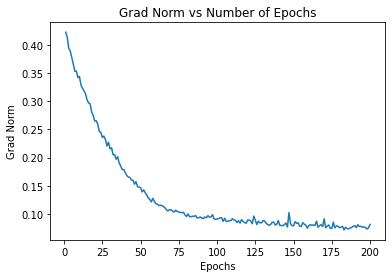

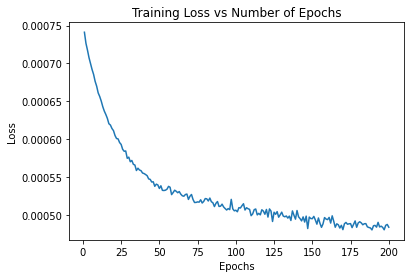

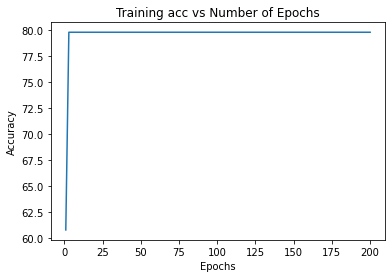

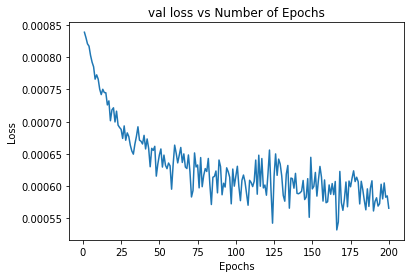

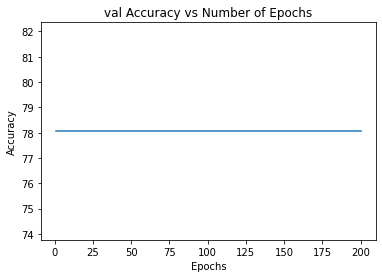

test Accuracy =  tensor(80.3500)
test loss =  0.01362235388159752
total time taken this loop:  17.171590328216553
num : 2
I switched here
Switch happened at this step =  2
This is at epoch =  0
Epoch: 1 	Train Loss: 0.0006	 Acc: 70.02%
Epoch: 1 	Val Loss: 0.0000	 Acc: 78.06%
Epoch: 2 	Train Loss: 0.0005	 Acc: 79.80%
Epoch: 2 	Val Loss: 0.0000	 Acc: 78.06%
Epoch: 3 	Train Loss: 0.0005	 Acc: 79.80%
Epoch: 3 	Val Loss: 0.0000	 Acc: 78.06%
Epoch: 4 	Train Loss: 0.0005	 Acc: 79.80%
Epoch: 4 	Val Loss: 0.0000	 Acc: 78.06%
Epoch: 5 	Train Loss: 0.0005	 Acc: 79.80%
Epoch: 5 	Val Loss: 0.0000	 Acc: 78.06%
Epoch: 6 	Train Loss: 0.0005	 Acc: 79.80%
Epoch: 6 	Val Loss: 0.0000	 Acc: 78.06%
Epoch: 7 	Train Loss: 0.0005	 Acc: 79.80%
Epoch: 7 	Val Loss: 0.0000	 Acc: 78.06%
Epoch: 8 	Train Loss: 0.0005	 Acc: 79.80%
Epoch: 8 	Val Loss: 0.0000	 Acc: 78.06%
Epoch: 9 	Train Loss: 0.0005	 Acc: 70.42%
Epoch: 9 	Val Loss: 0.0000	 Acc: 78.06%
Epoch: 10 	Train Loss: 0.0005	 Acc: 70.42%
Epoch: 10 	Val Loss: 0.00

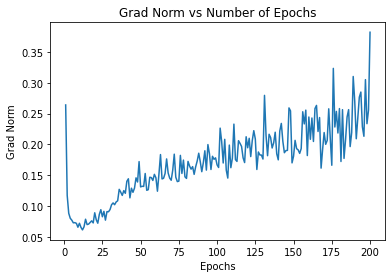

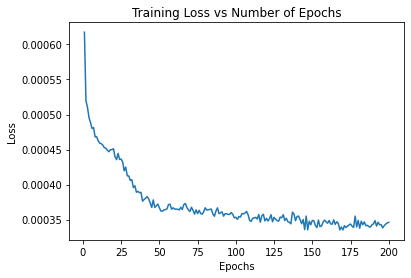

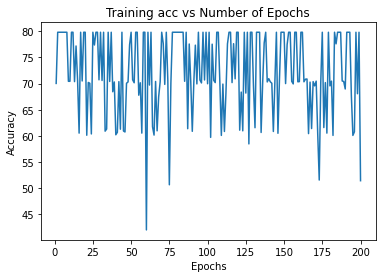

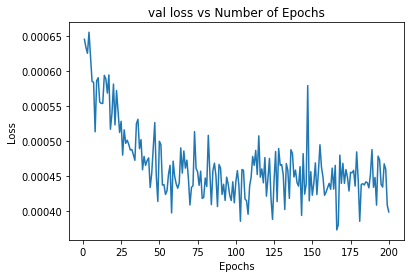

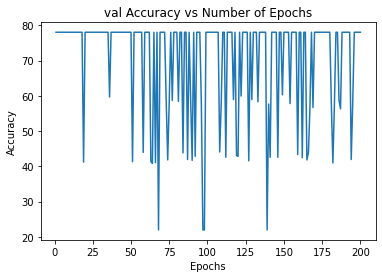

test Accuracy =  tensor(69.2500)
test loss =  0.01069883019477129
total time taken this loop:  16.81705927848816
num : 3
ADAM | Current epoch =  1
ADAM | Current epoch =  1
ADAM | Current epoch =  1
ADAM | Current epoch =  1
ADAM | Current epoch =  1
ADAM | Current epoch =  1
ADAM | Current epoch =  1
Epoch: 1 	Train Loss: 0.0007	 Acc: 60.80%
Epoch: 1 	Val Loss: 0.0000	 Acc: 78.06%
ADAM | Current epoch =  2
ADAM | Current epoch =  2
ADAM | Current epoch =  2
ADAM | Current epoch =  2
ADAM | Current epoch =  2
ADAM | Current epoch =  2
ADAM | Current epoch =  2
Epoch: 2 	Train Loss: 0.0007	 Acc: 79.80%
Epoch: 2 	Val Loss: 0.0000	 Acc: 78.06%
ADAM | Current epoch =  3
ADAM | Current epoch =  3
ADAM | Current epoch =  3
ADAM | Current epoch =  3
ADAM | Current epoch =  3
ADAM | Current epoch =  3
ADAM | Current epoch =  3
Epoch: 3 	Train Loss: 0.0007	 Acc: 79.80%
Epoch: 3 	Val Loss: 0.0000	 Acc: 78.06%
ADAM | Current epoch =  4
ADAM | Current epoch =  4
ADAM | Current epoch =  4
ADAM | Cu

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:155: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



Mix batch count =  0

MIX | Current epoch =  61
MIX | SGD Weight =  0.0
MIX | Adam Weight =  1.0

Mix batch count =  0

MIX | Current epoch =  61
MIX | SGD Weight =  0.0
MIX | Adam Weight =  1.0

Mix batch count =  0

MIX | Current epoch =  61
MIX | SGD Weight =  0.0
MIX | Adam Weight =  1.0

Mix batch count =  0

MIX | Current epoch =  61
MIX | SGD Weight =  0.0
MIX | Adam Weight =  1.0

Mix batch count =  0

MIX | Current epoch =  61
MIX | SGD Weight =  0.0
MIX | Adam Weight =  1.0
Epoch: 61 	Train Loss: 0.0004	 Acc: 79.80%
Epoch: 61 	Val Loss: 0.0000	 Acc: 78.06%

Mix batch count =  1

MIX | Current epoch =  62
MIX | SGD Weight =  0.012658227848101266
MIX | Adam Weight =  0.9873417721518988

Mix batch count =  1

MIX | Current epoch =  62
MIX | SGD Weight =  0.012658227848101266
MIX | Adam Weight =  0.9873417721518988

Mix batch count =  1

MIX | Current epoch =  62
MIX | SGD Weight =  0.012658227848101266
MIX | Adam Weight =  0.9873417721518988

Mix batch count =  1

MIX | Current

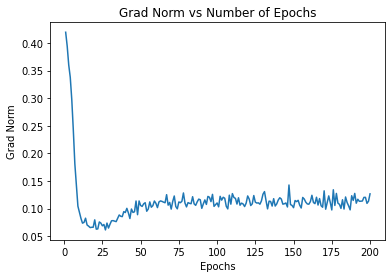

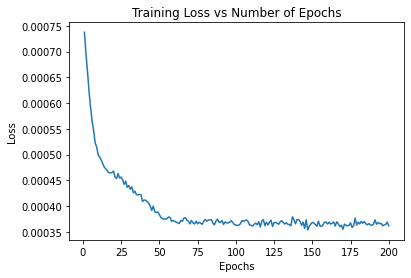

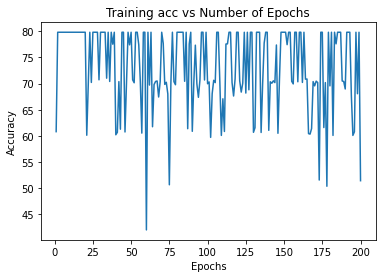

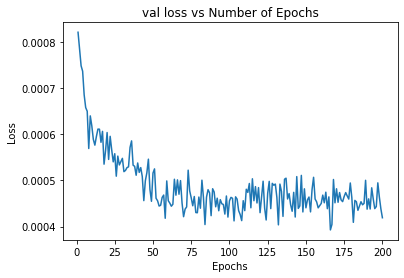

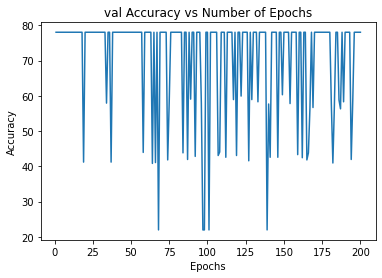

test Accuracy =  tensor(72.5500)
test loss =  0.01091488029807806
total time taken this loop:  18.64317774772644
num : 4
ADAM | Current epoch =  1
ADAM | Current epoch =  1
ADAM | Current epoch =  1
ADAM | Current epoch =  1
ADAM | Current epoch =  1
ADAM | Current epoch =  1
ADAM | Current epoch =  1
Epoch: 1 	Train Loss: 0.0006	 Acc: 70.02%
Epoch: 1 	Val Loss: 0.0000	 Acc: 78.06%
ADAM | Current epoch =  2
ADAM | Current epoch =  2
ADAM | Current epoch =  2
ADAM | Current epoch =  2
ADAM | Current epoch =  2
ADAM | Current epoch =  2
ADAM | Current epoch =  2
Epoch: 2 	Train Loss: 0.0005	 Acc: 79.80%
Epoch: 2 	Val Loss: 0.0000	 Acc: 78.06%
ADAM | Current epoch =  3
ADAM | Current epoch =  3
ADAM | Current epoch =  3
ADAM | Current epoch =  3
ADAM | Current epoch =  3
ADAM | Current epoch =  3
ADAM | Current epoch =  3
Epoch: 3 	Train Loss: 0.0005	 Acc: 79.80%
Epoch: 3 	Val Loss: 0.0000	 Acc: 78.06%
ADAM | Current epoch =  4
ADAM | Current epoch =  4
ADAM | Current epoch =  4
ADAM | Cu

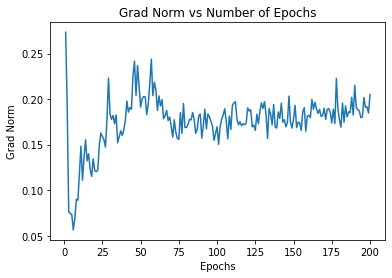

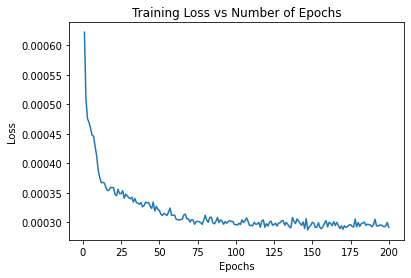

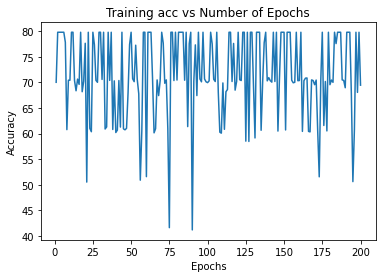

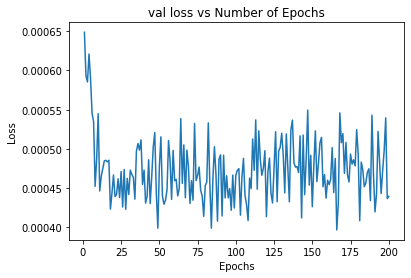

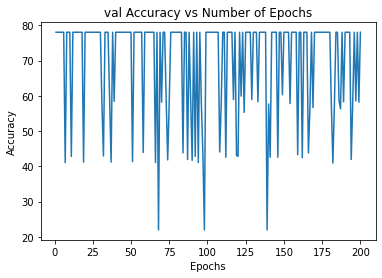

test Accuracy =  tensor(69.9500)
test loss =  0.011486813418567181
total time taken this loop:  19.230498552322388


In [18]:
import time
#opti = ["AdamSGD"]
opti = ['MY', 'ADAM']
opti = ["SWATS","MY"]
batch_size = [1024] # set at 1024 after tuning
loss_fn = [nn.BCELoss()]

clipping = [False] # set to false
lr = [0.001,0.01]
hidden_dim = [32]
drop = [0]
weight_decay = [0]
mom = [0.9]
dampening = [0]
nest = [False] #set
Betas = [(0.9,0.999)] # set
eps = [1e-8] # set
amsgra = [False] #set
adam_w = [0.5]
sgd_w= [0.5]
tolerance = [0.001] # doesnt switch with 0.0001
final_lr = [0.01]
adam_phasee = [0.3]
mix_phasee = [0.4]


paramDic = {
    "opti":[],
    "Batch_size": [],
    "loss_fn":[],
    "epochs":[],
    "clipping":[],
    "lr":[],
    "hidden_dim":[],
    "drop":[],
    "weight_decay":[],
    "mom":[],
    "dampening":[],
    "nest":[],
    "Betas":[],
    "eps":[],
    "amsgra":[],
    "adam_w":[],
    "sgd_w":[],
    "tolerance":[],
    
    "epoch_list":[],
    "train_loss_list":[],
    "train_acc_list":[],
    "val_loss_list":[],
    "val_acc_list":[],
    "batchy_norm":[],
    "epoch_norm":[],
    "accuracy_test":[],
    "y_pred_list":[],
    "y_actual":[],
    "Validation_Acc_result":[],
    "time":[]  
}


plots = True
Print = True
opPrint = True
i=0

epochs = 200

from sklearn import metrics
for adam_phase in adam_phasee:
    for mix_phase in mix_phasee:
        for o in opti:
            for b in batch_size:
                for loss in loss_fn:
                    for c in clipping:
                        for l in lr:
                            for h in hidden_dim:
                                for d in drop:
                                    for w in weight_decay:
                                        for m in mom:
                                            for dam in dampening:
                                                for n in nest:
                                                    for e in eps:
                                                        for ams in amsgra:
                                                            for ad_w in adam_w:
                                                                for t in tolerance:
                                                                    for f in final_lr:
                                                                        #print(t,type(t))

                                                                        i+=1
                                                                        seed_everything(42)
                                                                        print("num :", i)
                                                                        start_time = time.time()


                                                                        #Note h,d are not being used

                                                                        model=ANN( input_dim = X_test.shape[1] ,hidden_dim = h, output_dim = 1, drop = d )


                                                                        epoch_list, train_loss_list,train_acc_list, val_loss_list, val_acc_list, batchy_norm, epoch_norm, diff = TrainVal(model, train , test, o ,b, loss, epochs , c, l,  w,m, dam, n,(0.9,0.999), e,t, ams,ad_w,
                                                                                 1-ad_w, final_lr = f,adam_phase=adam_phase, mix_phase=mix_phase,plots = plots, Print = Print, opPrint = opPrint)
                                                                        accuracy_test, y_pred_list, y_actual = testing(model, test ,32, loss ,plots = True, Print = True)

                                                                        end_time = time.time()
                                                                        print("total time taken this loop: ", end_time - start_time)

                                                                


                                                                        paramDic["opti"].append(o)
                                                                        paramDic["Batch_size"].append(b)
                                                                        paramDic["loss_fn"].append(loss)
                                                                        paramDic["clipping"].append(c)
                                                                        paramDic["lr"].append(l)
                                                                        paramDic["hidden_dim"].append(h)
                                                                        paramDic["drop"].append(d)
                                                                        paramDic["weight_decay"].append(w)
                                                                        paramDic["mom"].append(m)
                                                                        paramDic["dampening"].append(dam)
                                                                        paramDic["nest"].append(n)
                                                                        #paramDic["betas"].append(bet)
                                                                        paramDic["eps"].append(e)
                                                                        paramDic["tolerance"].append(t)
                                                                        paramDic["amsgra"].append(ams)
                                                                        paramDic["adam_w"].append(ad_w)



                                                                        tot = 0
                                                                        j = 1
                                                                        for p in range(5):
                                                                            tot +=val_acc_list[-j]
                                                                            j +=1

                                                                        Validation_Acc_result = tot/5



                                                                            #Metrics
                                                                paramDic["epoch_list"].append(epoch_list)
                                                                paramDic["train_loss_list"].append(train_loss_list)
                                                                paramDic["train_acc_list"].append(train_acc_list)
                                                                paramDic["val_loss_list"].append(val_loss_list)
                                                                paramDic["val_acc_list"].append(val_acc_list)
                                                                paramDic["batchy_norm"].append(batchy_norm)
                                                                paramDic["epoch_norm"].append(epoch_norm)
                                                                paramDic["accuracy_test"].append(accuracy_test)
                                                                paramDic["y_pred_list"].append(y_pred_list)
                                                                paramDic["y_actual"].append(y_actual)
                                                                paramDic["Validation_Acc_result"].append(Validation_Acc_result)
                                                                paramDic["time"].append(end_time - start_time)

In [19]:

#print(paramDic)
print(paramDic["opti"])
print(paramDic["Validation_Acc_result"])
#paramDic["Validation_Acc_result"]

array = paramDic["Validation_Acc_result"]

print("The index is :",np.where(array == np.amax(array))[0])
print("\nThe best accuracy is ", np.amax(array))
keys = [ "lr","opti","Validation_Acc_result", "accuracy_test","epoch_list","train_loss_list","train_acc_list","val_loss_list","val_acc_list","batchy_norm","epoch_norm","y_pred_list"]
for i in keys:
    if len(np.where(array == np.amax(array))[0]) >1:
        print(i+":" , paramDic[i][(np.where(array == np.amax(array))[0])[0]])
    else:
        print(i+":" , paramDic[i][(int(np.where(array == np.amax(array))[0]))]) 

['SWATS', 'SWATS', 'MY', 'MY']
[tensor(78.0625), tensor(78.0625), tensor(78.0625), tensor(70.1875)]
The index is : [0 1 2]

The best accuracy is  78.0625
lr: 0.001
opti: SWATS
Validation_Acc_result: tensor(78.0625)
accuracy_test: tensor(80.3500)
epoch_list: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170,